In [1]:
import tensorflow as tf
import numpy as np

##### Consider this as a base to understand the word2vec mechnaism. And how to create custom word2vec on use case specific dataset.Don't take the result seriously shown here. There is a huge scope of improvement in learning embedddings if the corpous is considerably large
 

In [2]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen'

In [3]:
# convert to lower case
corpus_raw = corpus_raw.lower()

In [4]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

In [5]:
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

In [6]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [7]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [9]:
WINDOW_SIZE = 2
data = []

In [10]:
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [11]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [12]:
x_train = [] # input word
y_train = [] # output word

In [13]:
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))


In [14]:
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [15]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [16]:
EMBEDDING_DIM = 5 # you can choose your own number

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [17]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [18]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 10000
# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))



loss is :  3.09713
loss is :  3.00454
loss is :  2.92345
loss is :  2.85023
loss is :  2.78309
loss is :  2.72099
loss is :  2.66331
loss is :  2.6096
loss is :  2.55951
loss is :  2.51276
loss is :  2.4691
loss is :  2.42831
loss is :  2.39017
loss is :  2.35447
loss is :  2.32102
loss is :  2.28962
loss is :  2.26009
loss is :  2.23225
loss is :  2.20594
loss is :  2.18101
loss is :  2.15733
loss is :  2.13476
loss is :  2.11321
loss is :  2.09257
loss is :  2.07277
loss is :  2.05372
loss is :  2.03538
loss is :  2.01769
loss is :  2.0006
loss is :  1.98407
loss is :  1.96808
loss is :  1.9526
loss is :  1.9376
loss is :  1.92306
loss is :  1.90896
loss is :  1.89529
loss is :  1.88203
loss is :  1.86917
loss is :  1.85669
loss is :  1.84459
loss is :  1.83285
loss is :  1.82147
loss is :  1.81043
loss is :  1.79973
loss is :  1.78935
loss is :  1.77929
loss is :  1.76954
loss is :  1.76009
loss is :  1.75093
loss is :  1.74206
loss is :  1.73346
loss is :  1.72514
loss is :  1.7170

In [19]:
vectors = sess.run(W1 + b1)

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [20]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [21]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

{'queen', 'royal', 'king', 'the', 'she', 'he', 'is'}
queen -0.34337 -0.9392
royal 0.232427 -0.972614
king 0.715026 -0.699098
the -0.946946 -0.321394
she 0.979028 -0.203727
he 0.600793 -0.799405
is 0.905827 0.423649


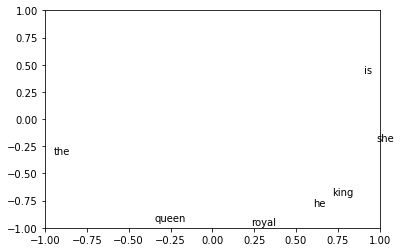

In [29]:
fig, ax = plt.subplots()
ax.set_xlim([-1,1])
ax.set_ylim([-1, 1])
print(words)

for word in words:
    print(word, vectors[word2int[word]][0],vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    
plt.show()